In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Figura 2.2

Vamos a integrar la ecuación 2.29 con condición inicial $u(0)=1$

\begin{equation}
\dfrac{du(t)}{dt} = -u(t) \hspace{3cm} (2.29)
\end{equation}


La solución analítica de $u(t)=e^{-t}$
y $h=-u $

#### Hacemos el vector de tiempo y escribimos la función $u(t)$

In [14]:
def u(t):
    u = np.exp(-t)
    return u

dt = 0.2
t = np.arange(0,3,dt)

#### Integramos haciendo la diferenciación por derecha

\begin{equation}
u^{n+1} = u^{n} + h^{n}  dt  \hspace{3cm} (2.25)
\end{equation}

\begin{equation}
= u^{n} - u^{n}  dt  \hspace{3cm}
\end{equation}

\begin{equation}
= u^{n}  (1 - dt) \hspace{3cm}
\end{equation}

In [15]:
u_d = np.zeros(len(t))

u_d[0] = u(0)

for i in range(0,len(t)-1):  
    u_d[i+1] = u_d[i] * (1. - dt)

#### Integramos haciendo la diferenciación por izquierda
\begin{equation}
u^{n+1} = u^{n} + h^{n+1}  dt \hspace{3cm} (2.26) 
\end{equation}

\begin{equation}
= u^{n} - u^{n+1}  dt \hspace{3cm}
\end{equation}

\begin{equation}
= u^{n} / (1 + dt) \hspace{3cm}
\end{equation}


In [16]:
u_i = np.zeros(len(t))

u_i[0] = u(0)

for i in range(0,len(t)-1):  
    u_i[i+1] = u_i[i]/(1. + dt)

#### Integramos haciendo la diferenciación centrada
\begin{equation}
u^{n+1} = u^{n} + \dfrac{[h^{n} + h^{n+1}]}{2} dt  \hspace{3cm} (2.27)
\end{equation}

\begin{equation}
= u^{n} - \dfrac{[u^{n} + u^{n+1}]}{2} dt   \hspace{3cm}
\end{equation}

\begin{equation}
= u^{n}\dfrac{2-dt}{2+dt}  \hspace{5cm}
\end{equation}

In [17]:
u_c = np.zeros(len(t))

u_c[0] = u(0)

for i in range(0,len(t)-1):  
    u_c[i+1] = u_c[i] * (2. - dt)/(2. + dt)

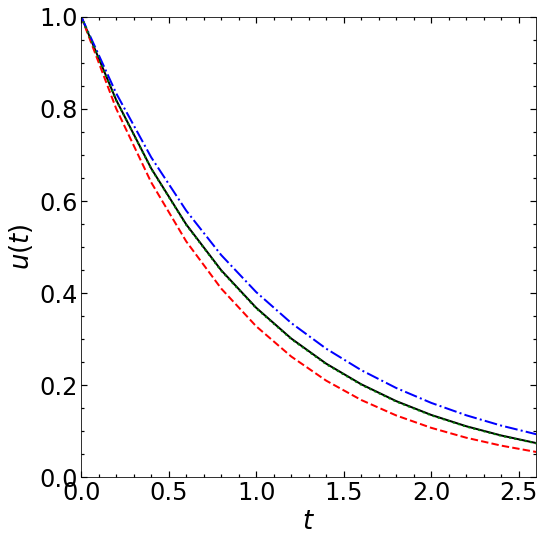

In [18]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(t,u(t),'-', color='k' ,lw=2)
ax.plot(t,u_d,'--', color='r', lw=2)
ax.plot(t,u_i,'-.', color='b', lw=2)
ax.plot(t,u_c,':', color='g', lw=2)
ax.set_xlim(0,2.6)
ax.set_ylim(0,1)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$t$', fontsize=26)
ax.set_ylabel(r'$u(t)$',fontsize=26)
plt.show()

#### Calculamos los errores

In [19]:
error_d = (u_d - u(t))/u(t)
error_i = (u_i - u(t))/u(t)
error_c = (u_c - u(t))/u(t)

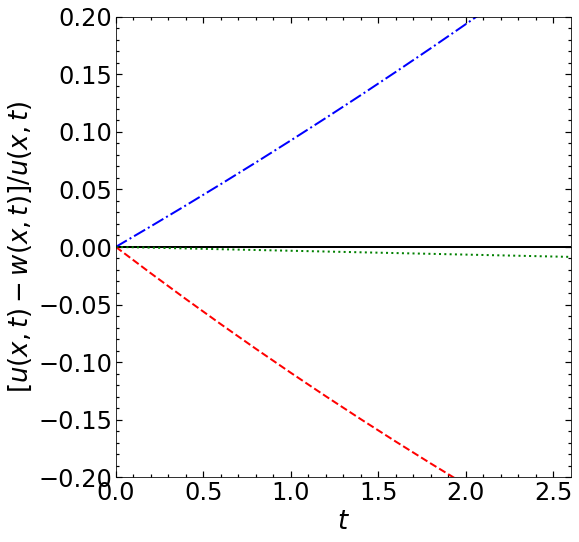

In [28]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.axhline(y=0,xmin=-0.1, xmax= 3, color='k', ls='-', lw=2)
ax.plot(t,error_d,'--', color='r', lw=2)
ax.plot(t,error_i,'-.', color='b', lw=2)
ax.plot(t,error_c,':', color='g', lw=2)
ax.set_xlim(0,2.6)
ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$t$', fontsize=26)
ax.set_ylabel(r'$[u(x,t)-w(x,t)]/u(x,t)$',fontsize=26)
plt.show()


# Figura 2.3

Vamos a integrar la ecuación 2.30, con el esquema de la ec. 2.32 y con condición inicial $w(x,1)$, obtenida de la ec. 2.31 para t=1

\begin{equation}
\dfrac{du}{dt} = v_{d}\dfrac{d^{2}u}{dx^{2}} \:\:\:\:\:(2.30)
\end{equation}

\begin{equation}
w(x,t) = 2 \sum_{n=1}^{\infty}sin(\dfrac{\pi n}{2})sin(\pi nx)exp(-\pi^{2}n^{2}v_{d}t) \:\:\:\:\:(2.31)
\end{equation}

\begin{equation}
u^{n+1}_{j} = u^{n}_{j} + \dfrac{v_{d}\Delta t}{(\Delta x)^{2}}(u^{n}_{j+1} + u^{n}_{j-1} -2 u^{n}_{j}) \:\:\:\:\:(2.32)
\end{equation}


## Calculamos el W

In [57]:
dt = [0.2, 0.1, 0.05]

#### W en t0 =1 y t1 =3

In [58]:
t0 = 1.
t1 = 3.

def w(x, t, vd):
    sumatoria = 0.
    for i in range(1,1000):
        q1 = np.sin(pi*i/2.)
        q2 = np.sin(pi*i*x)
        q3 = np.exp(-vd*t*(pi*i)**2.)
        
        sumatoria = sumatoria + q1*q2*q3

    w = 2*sumatoria
    
    return w


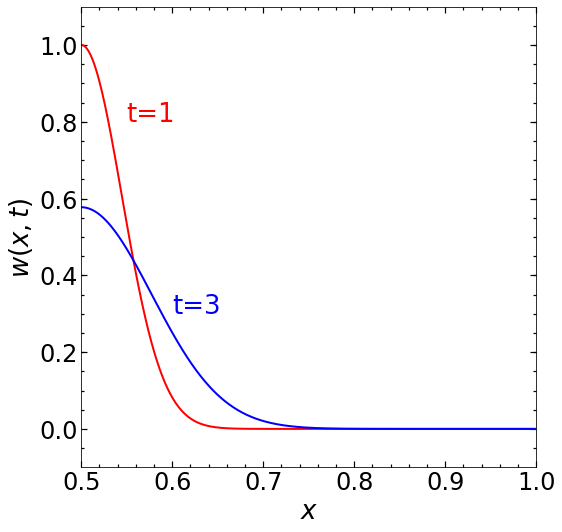

In [59]:
import numpy as np
x = np.arange(0.5,1,0.001)
vd = 0.001

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(x,w(x,t0,vd)/w(0.5,t0,vd),'-', color='r', lw=2)
ax.plot(x,w(x,t1,vd)/w(0.5,t0,vd),'-', color='b', lw=2)
ax.set_xlim(0.5,1)
ax.set_ylim(-0.1,1.1)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x$', fontsize=26)
ax.set_ylabel(r'$w(x,t)$',fontsize=26)
ax.text(0.6,0.3,'t=3', fontsize=26, color='b')
ax.text(0.55,0.8,'t=1', fontsize=26, color='r')
plt.show()



## Integramos con diferentes dt

filas= 10 colum= 47
filas= 20 colum= 67
filas= 40 colum= 107


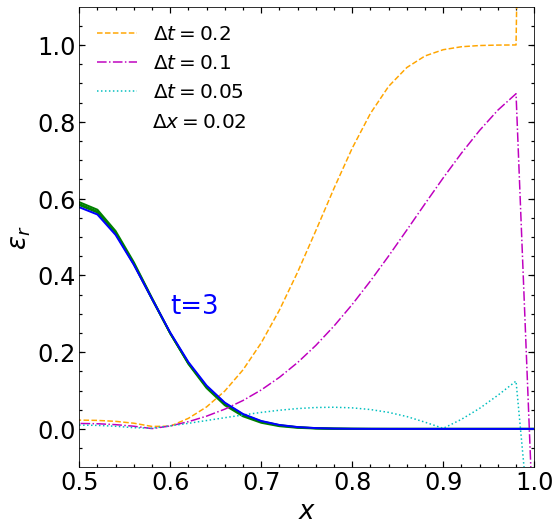

In [60]:
dx = 0.02
dt = np.array([0.2,0.1,0.05])

vector =['orange','m','c']
lineas =['--','-.',':']
titulo =['$\Delta t = 0.2$','$\Delta t = 0.1$','$\Delta t = 0.05$']
for k in range(0,3):
    filas = np.int((t1-t0)/dt[k])
    
    aux = (filas+1) * dx
    x = np.arange(0.5-aux,1.+aux, dx) #acá agregamos tantos puntos como pasos de integración tenemos (porque los vamos a perder)
    
    colum = np.int(len(x))
    
    print 'filas=', filas, 'colum=', colum

    u  = np.zeros([filas, colum])
    u[0,:] = w(x,t0,vd)

#     print np.shape(u)

    for i in range(0,filas-1):
#         print i
        for j in range(i, colum-i-1):
            u[i+1,j] = u[i,j] + vd * dt[k]/dx**2 * (u[i,j+1] + u[i,j-1] - 2*u[i,j])
            
#     plt.plot(x,u[-1,:]/w(0.5,t0,vd))
#     plt.xlim(0.5,1)
#     plt.ylim(-0.1,1.)
    
    error = abs(u[-1,:] - w(x,t1,vd))/w(x,t1,vd)
    
    fig=plt.figure(1, figsize=(8,8))
    fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)

    ax.plot(x,u[-1,:]/w(0.5,t0,vd),'-', color='g', lw=2)
    ax.plot(x, error,ls=lineas[k], color=vector[k], label=titulo[k])
    
    
ax.plot(x,w(x,t1,vd)/w(0.5,t0,vd),'-', color='b', lw=2)
ax.set_xlim(0.5,1)
ax.set_ylim(-0.1,1.1)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x$', fontsize=26)
ax.set_ylabel(r'$\epsilon_{r}$',fontsize=26)
ax.text(0.6,0.3,'t=3', fontsize=26, color='b')
ax.text(0.58,0.8,'$\Delta x = 0.02$', fontsize=20, color='k', ha='left', va='center')
ax.legend(fontsize=20,frameon=False)
plt.show()


filas= 10 colum= 36
filas= 20 colum= 46
filas= 40 colum= 66


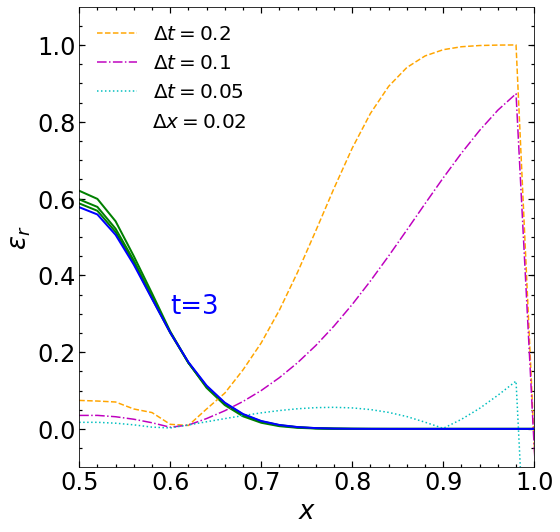

In [63]:
dx = 0.02
dt = np.array([0.2,0.1,0.05])
vd = 0.001

vector =['orange','m','c']
lineas =['--','-.',':']
titulo =['$\Delta t = 0.2$','$\Delta t = 0.1$','$\Delta t = 0.05$']
for k in range(0,3):
    filas = np.int((t1-t0)/dt[k])
    
    aux = (filas+1) * dx
    x = np.arange(0.5, 1.+aux, dx)
    
    colum = np.int(len(x))
    
    print 'filas=', filas, 'colum=', colum

    u  = np.zeros([filas, colum])
    u[0,:] = w(x,t0,vd)
    
#     print np.shape(u)

    for i in range(0,filas-1):
        u[i+1,0] = w(x[0], t0 + (dt[k]*i), vd)
        
#         print w(x[0], t0 + (dt[k]*i), vd)
        for j in range(1, colum-i-1):            
            u[i+1,j] = u[i,j] + vd * dt[k]/dx**2 * (u[i,j+1] + u[i,j-1] - 2*u[i,j])
            
#     plt.plot(x,u[-1,:]/w(0.5,t0,vd))
#     plt.xlim(0.5,1)
#     plt.ylim(-0.1,1.)
    
    error = abs(u[-1,:] - w(x,t1,vd))/w(x,t1,vd)
    
#     plt.plot (x, error,'--')
# plt.plot(x,w(x,t1,vd)/10)

    fig=plt.figure(1, figsize=(8,8))
    fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)

    ax.plot(x,u[-1,:]/w(0.5,t0,vd),'-', color='g', lw=2)
    ax.plot(x, error,ls=lineas[k], color=vector[k], label=titulo[k])
    
    
ax.plot(x,w(x,t1,vd)/w(0.5,t0,vd),'-', color='b', lw=2)
ax.set_xlim(0.5,1)
ax.set_ylim(-0.1,1.1)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x$', fontsize=26)
ax.set_ylabel(r'$\epsilon_{r}$',fontsize=26)
ax.text(0.6,0.3,'t=3', fontsize=26, color='b')
ax.text(0.58,0.8,'$\Delta x = 0.02$', fontsize=20, color='k', ha='left', va='center')
ax.legend(fontsize=20,frameon=False)
plt.show()


## Integramos con diferentes dx

filas= 10 colum= 47
filas= 10 colum= 72
filas= 10 colum= 122


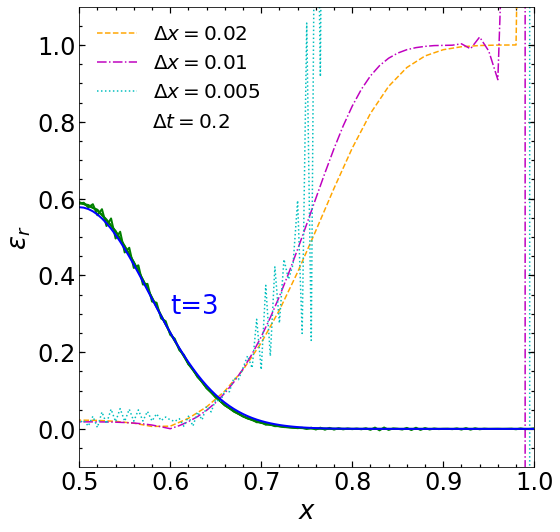

In [64]:
dx = np.array([0.02,0.01,0.005])
dt = 0.2
vd = 0.001

vector =['orange','m','c']
lineas =['--','-.',':']
titulo =['$\Delta x = 0.02$','$\Delta x = 0.01$','$\Delta x = 0.005$']
for k in range(0,3):
    filas = np.int((t1-t0)/dt)
    
    aux = (filas+1) * dx[k]
    x = np.arange(0.5-aux,1.+aux, dx[k]) #acá agregamos tantos puntos como pasos de integración tenemos (porque los vamos a perder)
    
    colum = np.int(len(x))
    
    print 'filas=', filas, 'colum=', colum

    u  = np.zeros([filas, colum])
    u[0,:] = w(x,t0,vd)

#     print np.shape(u)

    for i in range(0,filas-1):
#         print i
        for j in range(i, colum-i-1):
            u[i+1,j] = u[i,j] + vd * dt/dx[k]**2 * (u[i,j+1] + u[i,j-1] - 2*u[i,j])
            
#     plt.plot(x,u[-1,:]/w(0.5,t0,vd))
#     plt.xlim(0.5,1)
#     plt.ylim(-0.1,1.)
    
    error = abs(u[-1,:] - w(x,t1,vd))/w(x,t1,vd)
    
#     plt.plot (x, error,'--')
# plt.plot(x,w(x,t1,vd)/10)

    fig=plt.figure(1, figsize=(8,8))
    fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)

    ax.plot(x,u[-1,:]/w(0.5,t0,vd),'-', color='g', lw=2)
    ax.plot(x, error,ls=lineas[k], color=vector[k], label=titulo[k])
    
    
ax.plot(x,w(x,t1,vd)/w(0.5,t0,vd),'-', color='b', lw=2)
ax.set_xlim(0.5,1)
ax.set_ylim(-0.1,1.1)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x$', fontsize=26)
ax.set_ylabel(r'$\epsilon_{r}$',fontsize=26)
ax.text(0.6,0.3,'t=3', fontsize=26, color='b')
ax.text(0.58,0.8,'$\Delta t = 0.2$', fontsize=20, color='k', ha='left', va='center')
ax.legend(fontsize=20,frameon=False)
plt.show()


## Fig 2.4 

Vamos a integrar la ecuación $\frac{du}{dt} = -udt$ con condición inicial en $u(0)=1$

+ Ec 2.26  $\:\: u_{j}^{n+1} = u_{j}^{n} + h^{n+1} \Delta t $
+ Ec 2.27  $\:\: u_{j}^{n+1} = u_{j}^{n} + \frac{h^{n+1}+h^{n}}{2} \Delta t $
+ Ec 2.25  $\:\: u_{j}^{n+1} = u_{j}^{n} + h^{n} \Delta t $
+ Ec 2.33  $\:\: h^{n} = \frac{u_{j}^{n+1} - u_{j}^{n-1}}{2 \Delta t}$

In [67]:
def u(t):
    u = np.exp(-t)
    return u

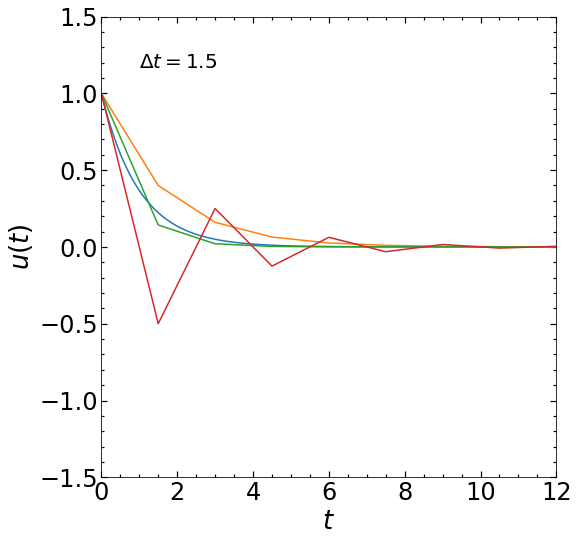

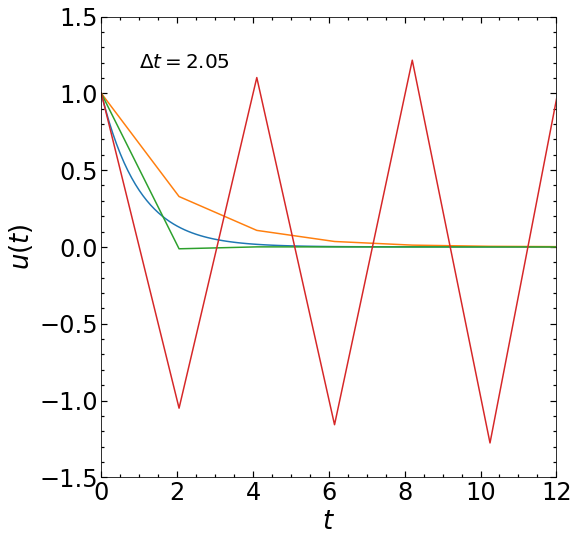

In [73]:
dt = [1.5,2.05]

titulo =['$\Delta t = 1.5$','$\Delta t = 2.05$']
for j in range(0,len(dt)):

    t = np.arange(0,15,dt[j])

    #-------------2.26---------------------------
    u_26 = np.zeros(len(t))

    u_26[0] = u(0)
    #h = -u
    for i in range(0,len(t)-1):  
        u_26[i+1] = u_26[i] / (1. + dt[j])

    #--------------2.27--------------------------
    u_27 = np.zeros(len(t))

    u_27[0] = u(0)
    #h = -u
    for i in range(0,len(t)-1):  
        u_27[i+1] = u_27[i] * (2. - dt[j])/(2. + dt[j])

    #------------2.25-----------------------------
    u_25 = np.zeros(len(t))

    u_25[0] = u(0)
    #h = -u
    for i in range(0,len(t)-1):  
        u_25[i+1] = u_25[i] * (1. - dt[j])


    #------------------------------------------------
    fig=plt.figure(j, figsize=(8,8))
    fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
    
    ax.plot(np.arange(0,12,0.1),u(np.arange(0,12,0.1)))
    ax.set_ylim(-1.5,1.5)
    ax.set_xlim(0,12)
    ax.plot(t,u_26)
    ax.plot(t,u_27)
    ax.plot(t,u_25)
    ax.minorticks_on()
    ax.tick_params(labelsize=24)
    ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
    ax.set_xlabel(r'$t$', fontsize=26)
    ax.set_ylabel(r'$u(t)$',fontsize=26)
    ax.text(1,1.2,titulo[j], fontsize=20, color='k', ha='left', va='center')
    plt.show()

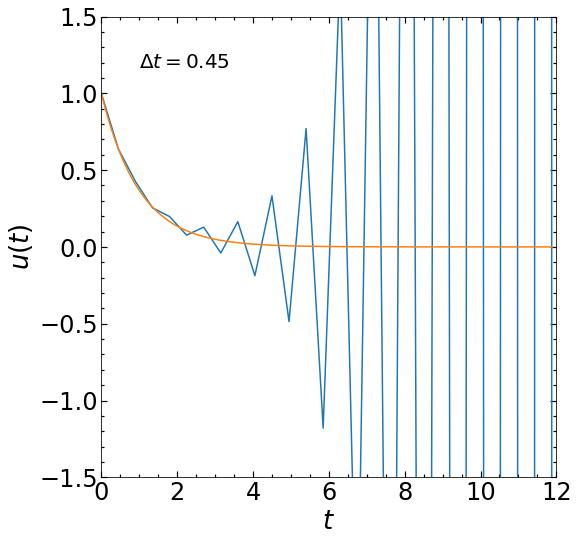

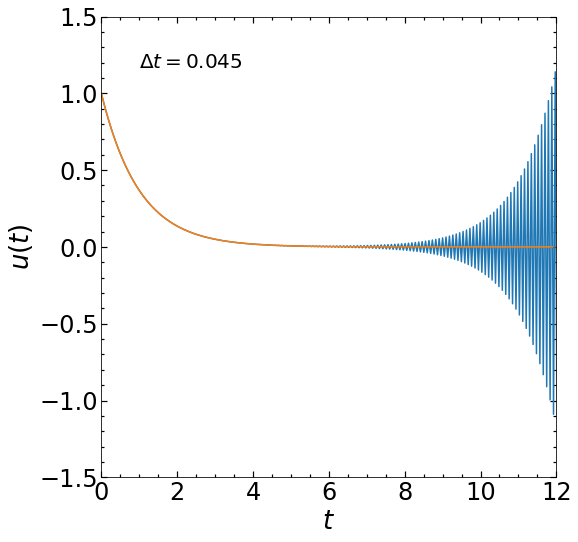

In [75]:
dt = [0.45,0.045]

titulo =['$\Delta t = 0.45$','$\Delta t = 0.045$']
for j in range(0,len(dt)):

    t = np.arange(0,15,dt[j])
    
    
    #------------2.33-------------------------------
    u_33 = np.zeros(len(t))

    u_33[0] = u(0)
    u_33[1] = u(dt[j])
    #h = -u
    for i in range(1,len(t)-1):  
        u_33[i+1] = u_33[i-1] - 2.*dt[j]*u_33[i]    
    
    fig=plt.figure(j, figsize=(8,8))
    fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
    ax.plot(t,u_33)
    ax.plot(np.arange(0,12,0.1),u(np.arange(0,12,0.1)))
    ax.set_ylim(-1.5,1.5)
    ax.set_xlim(0,12)
    ax.minorticks_on()
    ax.tick_params(labelsize=24)
    ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
    ax.set_xlabel(r'$t$', fontsize=26)
    ax.set_ylabel(r'$u(t)$',fontsize=26)
    ax.text(1,1.2,titulo[j], fontsize=20, color='k', ha='left', va='center')
    plt.show()
    